<a href="https://colab.research.google.com/github/Fatemah-Husain/Perspective-API-/blob/main/Blog_Perspective_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Identifying Toxicity in Arabic Text Using the Perspective API**

By Fatemah Husain (f.husain@ku.edu.kw) - Full post is available at the [Information Science Lab website](https://infoscilab.ku.edu.kw/identifying-toxicity-in-arabic-text-using-the-perspective-api/) - All resources used are available [at this GitHub repository](https://github.com/Fatemah-Husain/Perspective-API-).

*Disclaimer: This article explores the Perspective API for online toxic comments predictions. Some toxic comments shown in this article are samples selected for illustration purposes and do not represent the views of the author.*


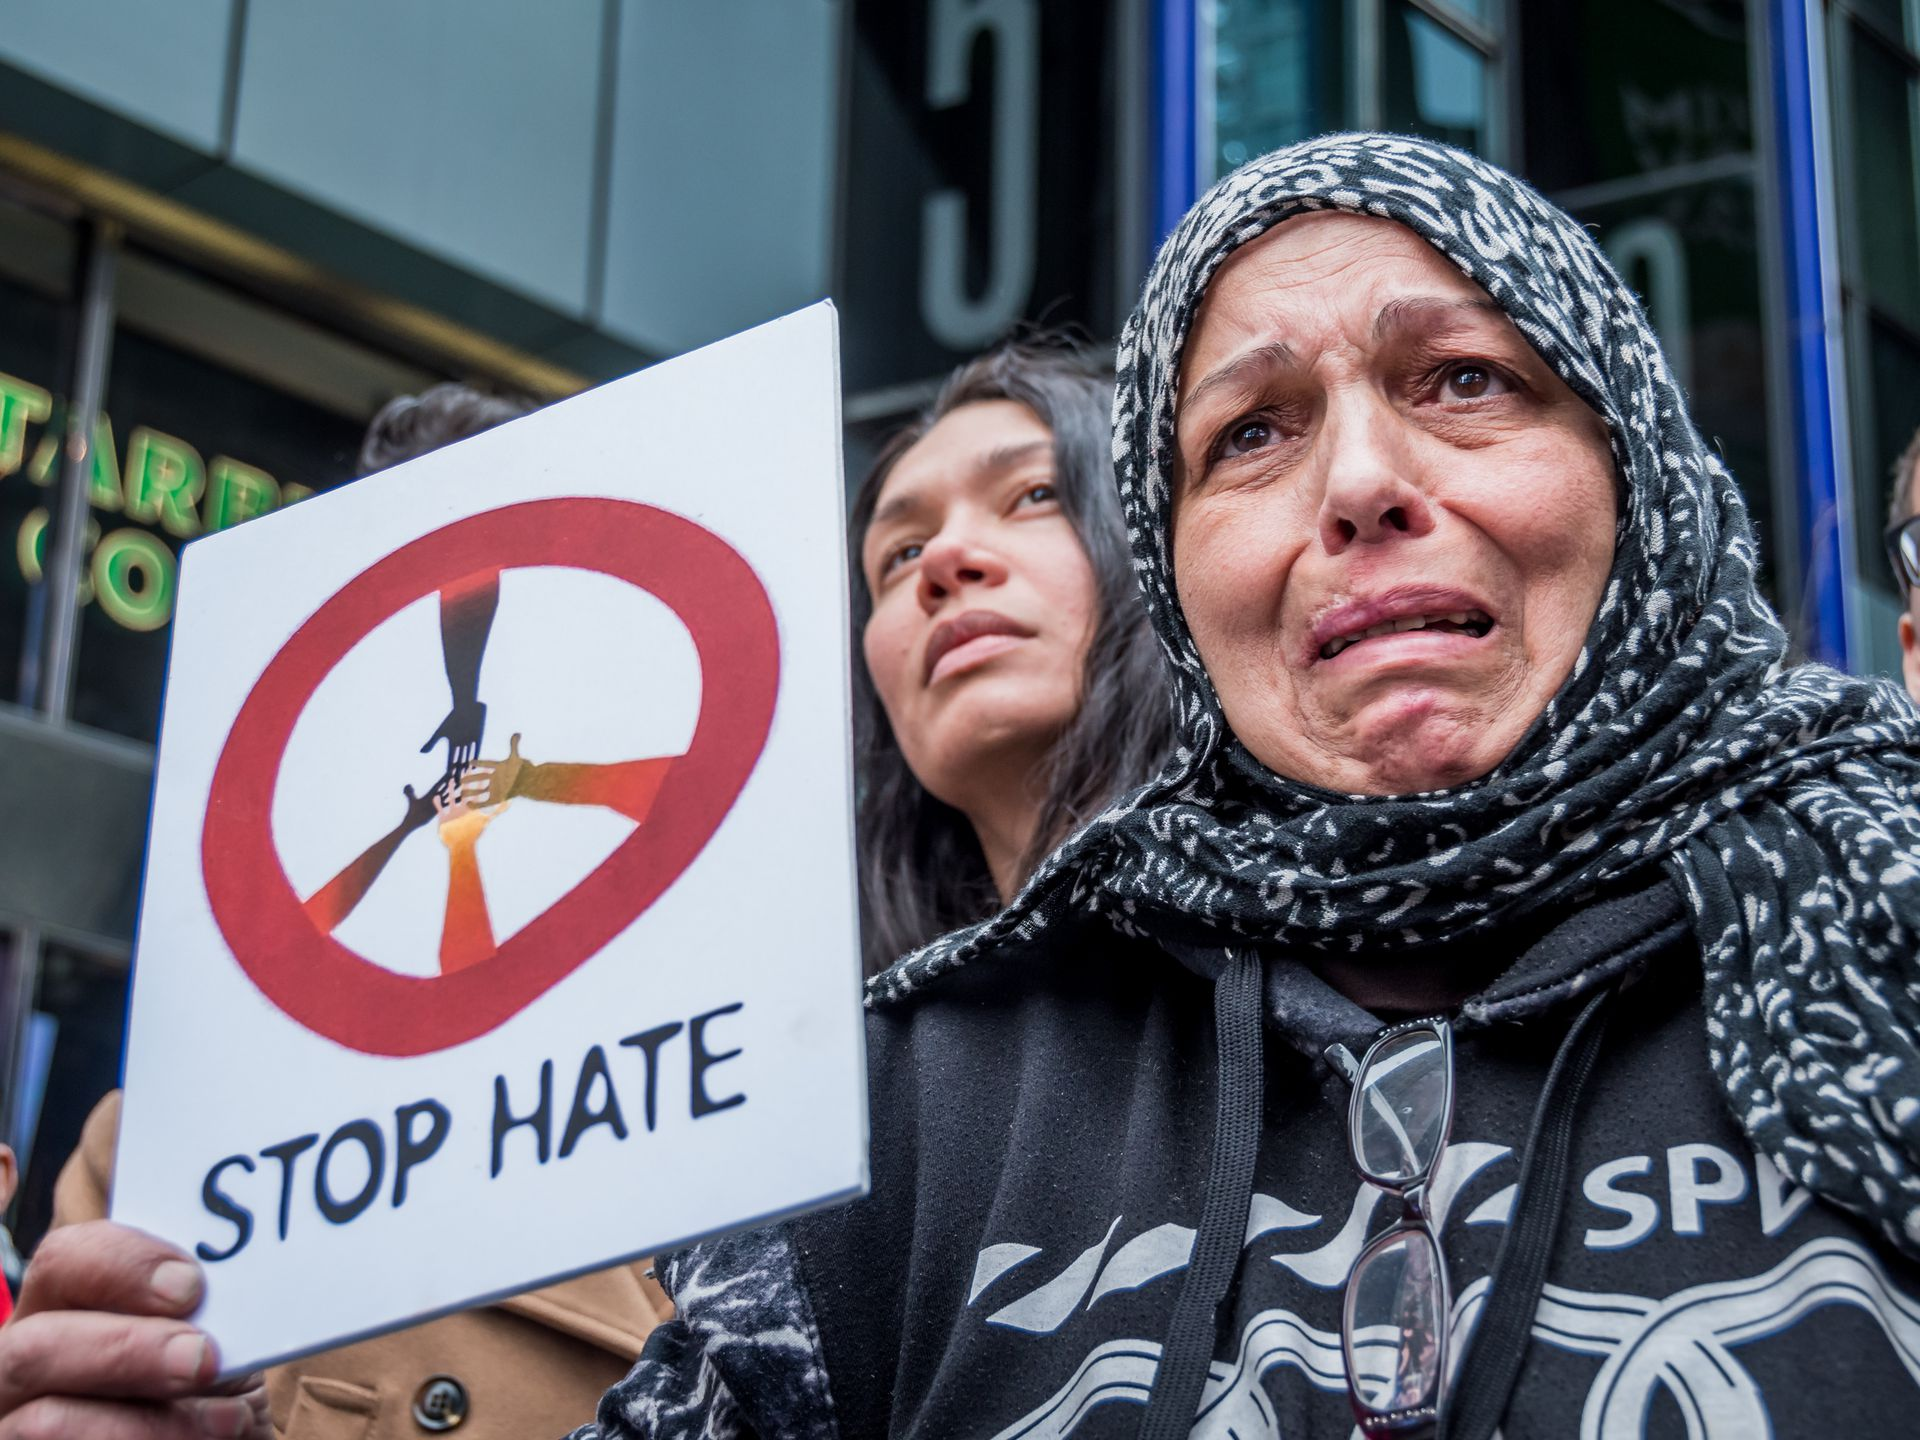

The increasing number of online platforms for user-generated content enable more people to experience the freedom of expression than ever before. In addition, users of these platforms can be anonymous and hide their identity, which can increase the chance of misusing these platforms. Online abusive and toxic conversation creates an exclusive environment and in more severe cases, it can foster real-world violence. Freedom of expression or speech should not promote harmful content like hate speech, bullying, or abusive behavior, and it needs protections to certify a safe and engaging environment in which all participants can freely express themselves without fear. 

Some countries have issued laws to ban hate speech, a kind of offensive language, on social networking platforms. For example, in 2017, Germany passed the Network Enforcement Act, a law that requires social media companies to remove hate speech from their websites. In addition to legislative reforms, technological solutions have been adopted to enforcing these reforms. 

In this Article, we will explore the Perspective API to identify toxic tweets written in the Arabic language. The main content of this article is summarized in the following points: 

1. Definition of toxicity in online comments.
2. Introduction to the Perspective API and its main features.
3. Dataset selection.
4. Applying the Perspective API.
5. Evaluating samples from the results.
6. How can it be used?



#Definition of toxicity in online comments:

[Risch and Krestel (2020)](https://link.springer.com/chapter/10.1007/978-981-15-1216-2_4) define a toxic comment as a rude, disrespectful, or unreasonable comment that is likely to make other users leave a discussion. The [OpenWeb](https://www.openweb.com/blog/toxic-online-comments-how-they-happen-and-how-to-stop-them) divides toxic comments based on two main categories: hate speech and online harassment or trolling.
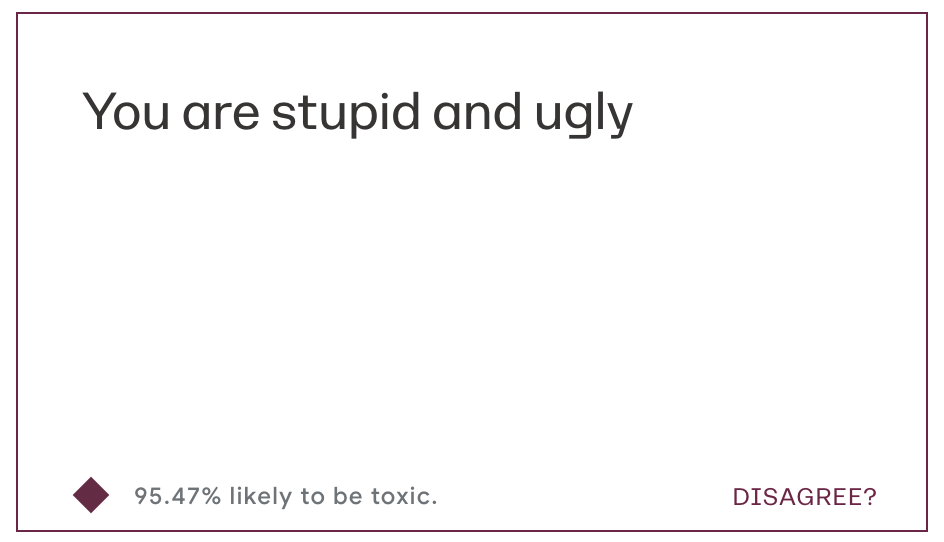

#Introduction to the Perspective API and its main features:

Google and the research group [Jigsaw](https://jigsaw.google.com/) develop the [Perspective API](https://perspectiveapi.com/) to promote better online conversations. The Perspective API applies machine learning algorithms to identify toxic comments and provide scores for 6 main attributes:

* Severe Toxicity
* Insult
* Profanity
* Identity attack
* Threat
* Sexually explicit


The perspective API is hosted on Google Cloud Platform. It is publicly available for free and support multiple languages; such as Arabic, Chinese, Czech, Dutch, English, French, German, Hindi, Hinglish, Indonesian, Italian, Japanese, Korean, Polish, Portuguese, Russian, and Spanish. 

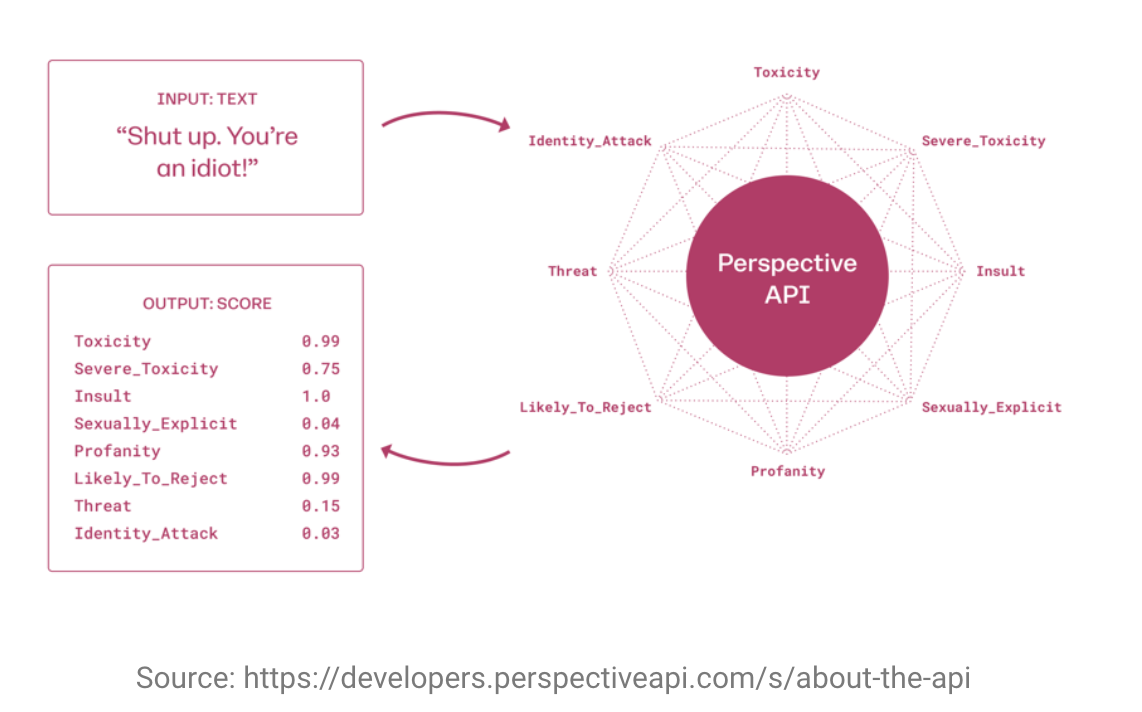

To get started with your project, you need to follow the instruction on [this Doc](https://developers.perspectiveapi.com/s/docs) and request an API access.

#Dataset Selection:

We select a recent topic that creates a controversial online Twitter conversation and an outrage in the Islamic world, after a derogatory comments insulting Prophet Muhammad (PBUH) by two members of Prime Minister Narendra Modi’s Bharatiya Janata Party (BJP). We extracted an Arabic dataset from Twitter based on the keywords: “#إلا_رسول_الله_يامودى” or “#طرد_السفير_الهندي”, and an English dataset based on the keywords: “#India”, “#modi”, or “#Stopinsulting_ProphetMuhammad”. The datasets are available [on this GitHub repository.](https://github.com/Fatemah-Husain/Perspective-API-)

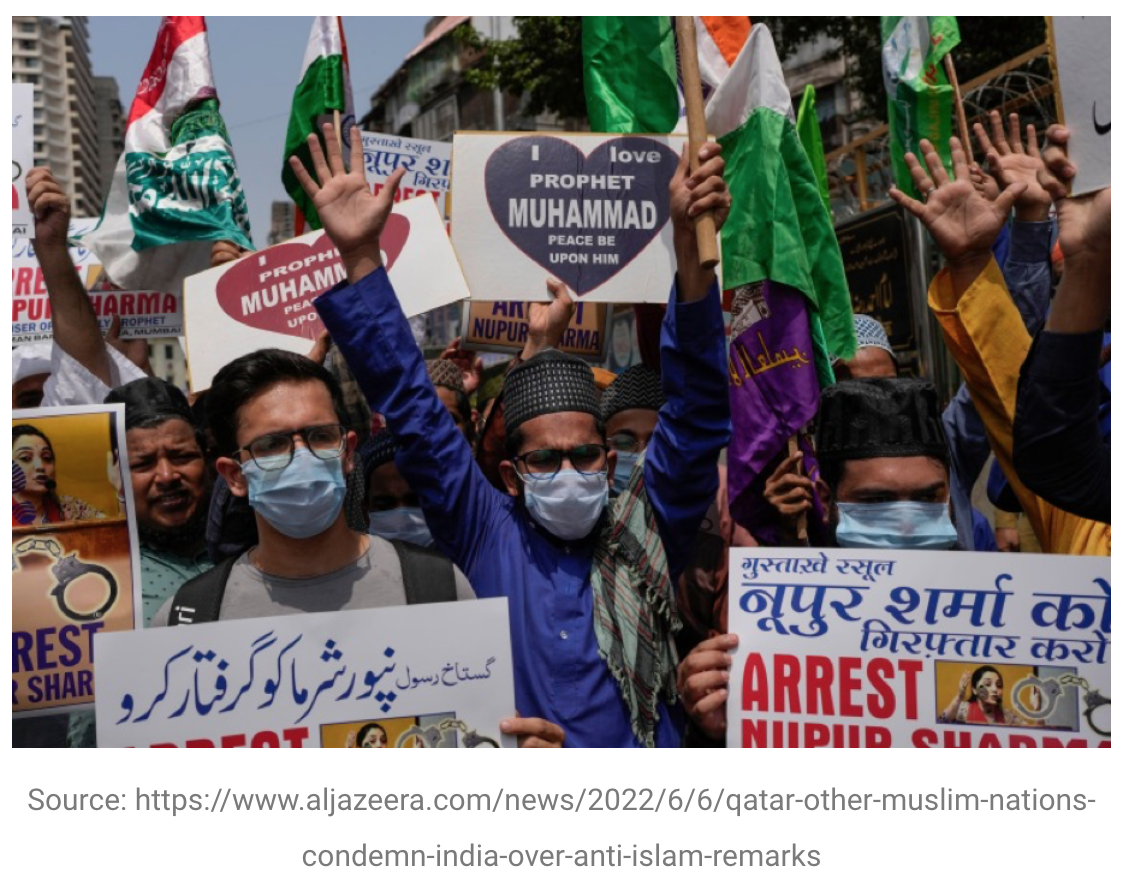

#Applying the Perspective API:

We will start by importing the libraries that are required during this exercise:

In [1]:
# importing libraries
import json 
import requests 
import csv
import pandas as pd
import numpy as np
import string 
import re

Next, we need to provide our code of the Perspective API key to access the API. This code is  passed to the AnalyzeComment method to provide an API request and analyze the tweets based on the the requested attributes as we will discuss below. 

In [2]:
# assigning the access code to the API
api_key = 'ADD Your Code Here'
url = ('https://commentanalyzer.googleapis.com/v1alpha1/comments:analyze' +    
    '?key=' + api_key)


The next step is uploading and reading the datasets. We have two datasets, Arabic and English tweets. 

In [4]:
# reading the English dataset
data_en = pd.read_csv('/content/Modi_Rasul_EN_6_2022.csv', header= None, names = 
 ['tweet_id',
    'tweet_text', 
    'tweet_location',
    'tweet_geo',
    'user_screen',
    'user_desc',
    'tweet_source',
    'tweet_created',
    'tweet_contributors',
    'tweet_entities',
    'tweet_retweet_count',
    'tweet_username',
    'tweet_followers_count'])

data_en


,tweet_id,tweet_text,tweet_location,tweet_geo,user_screen,user_desc,tweet_source,tweet_created,tweet_contributors,tweet_entities,tweet_retweet_count,tweet_username,tweet_followers_count
0,1535049015598907403,RT @KritiVerma_kv: The idols of deities at a #...,NaN,NaN,AmanPandey077,NaN,Twitter for Android,2022-06-09 23:59:39,1535049015598907403,"{'hashtags': [{'text': 'Hindu', 'indices': [45...",94,Aman Pandey,1.0
1,1535049009479716866,RT @sajournal1: India: Kanpur: Hundreds of Mu...,NaN,NaN,advHamedjabri,Myself,Twitter for Android,2022-06-09 23:59:38,1535049009479716866,"{'hashtags': [], 'symbols': [], 'user_mentions...",45,Hamed Ahmed JABRI,0.0
2,1535048940944445440,RT @sajournal1: The Hindu police in Kanpur bea...,NaN,NaN,yudi_mw,"Lux bus lover, single (interested in women), l...",Twitter Web App,2022-06-09 23:59:22,1535048940944445440,"{'hashtags': [], 'symbols': [], 'user_mentions...",588,yudi_mw,96.0
3,1535048936377176065,RT @KhaledBeydoun: Where's the western feminis...,Indocina,NaN,aj_hanif,Hal yang paling penting tuk mencapai suatu ksu...,Twitter for Android,2022-06-09 23:59:20,1535048936377176065,"{'hashtags': [{'text': 'China', 'indices': [92...",143,"abdul hanif, AJ",553.0
4,1535048816453296128,RT @sajournal1: Muslim woman’s husband was vic...,"Maharashtra, India",NaN,Sk_Zub,‏‏‏‏‏‏ہم وہاں ہیں جہاں سے ہم کو بھی ۔ \n ...,Twitter for Android,2022-06-09 23:58:52,1535048816453296128,"{'hashtags': [], 'symbols': [], 'user_mentions...",339,SK Z,172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10004,1534893793698271232,Afternoon all just a message to let you all kn...,NaN,NaN,Londonlips1,"I love to Chat , gossip and keep y'all informe...",Twitter for iPhone,2022-06-09 13:42:52,1534893793698271232,"{'hashtags': [{'text': 'london', 'indices': [1...",0,London lips,16.0
10005,1534893791030792194,RT @HananyaNaftali: “Pakistan will never recog...,NaN,NaN,MeiRakkha,Life is not about the amount of breath you tak...,Twitter Web App,2022-06-09 13:42:51,1534893791030792194,"{'hashtags': [{'text': 'India', 'indices': [97...",444,NaamMeiKyaRakkhaHai,13.0
10006,1534893772462358528,RT @RafiaSultan3: #ProphetMuhammad peace be up...,India,NaN,MohammedAbdulqu,Political activist with fear of almighty Allah,Twitter for Android,2022-06-09 13:42:46,1534893772462358528,"{'hashtags': [{'text': 'ProphetMuhammad', 'ind...",10,Mohammed Abdulquddus,208.0
10007,1534893764753358850,RT @KhaledBeydoun: Let’s be honest and clear: ...,NaN,NaN,faraztekken,Crypto/NFT Enthusiast,Twitter for Android,2022-06-09 13:42:45,1534893764753358850,"{'hashtags': [], 'symbols': [], 'user_mentions...",368,Faraz Ali,173.0


In [5]:
# reading the Arabic dataset
data_ar = pd.read_csv('/content/Modi_Rasul_ARAR_6_2022.csv', header = 0, names = 
 ['tweet_id',
    'tweet_text', 
    'tweet_location',
    'tweet_geo',
    'user_screen',
    'user_desc',
    'tweet_source',
    'tweet_created',
    'tweet_contributors',
    'tweet_entities',
    'tweet_retweet_count',
    'tweet_username',
    'tweet_followers_count'])
data_ar

,tweet_id,tweet_text,tweet_location,tweet_geo,user_screen,user_desc,tweet_source,tweet_created,tweet_contributors,tweet_entities,tweet_retweet_count,tweet_username,tweet_followers_count
0,1534324281768820737,إنَّ اللّٰه منتقمٌ لرسوله\nـصلّى اللّٰه عليه و...,"Muzaffarnagar, India",NaN,mohdmoonisgaur3,المتدرس بقسم الإفتاء بدار العلوم/ديوبند,Twitter for Android,2022-06-07 23:59:49,1.534324e+18,{'hashtags': [{'text': 'غضبة_المليار_لرسول_الل...,2.0,Mohd Moonis Gaur,93.0
1,1534324279134887944,RT @8qw6oVA6ZmIoJHb: #ارحل_يا_سيسي #إلا_رسول_ا...,NaN,NaN,iMJyZ5NFBd4edCD,‏عيلتى كل حياتى زملكاوى ولى الفخر,Twitter for Android,2022-06-07 23:59:49,1.534324e+18,"{'hashtags': [{'text': 'ارحل_يا_سيسي', 'indice...",17.0,احمد,103.0
2,1534324226920001541,RT @drassagheer: أبراج لوسيل في #قطر #إلا_رسول...,NaN,NaN,el3amarya,وَمَنْ أَحْسَنُ قَوْلًا مِّمَّن دَعَا إِلَى ال...,Twitter for iPhone,2022-06-07 23:59:36,1.534324e+18,"{'hashtags': [{'text': 'قطر', 'indices': [32, ...",531.0,و اتقوا يوما ترجعون فيه إلى الله,10.0
3,1534324220095782914,"RT @mohammedbnkasim: "" لاتدخروا وسعاً في نشر ا...",NaN,NaN,W6aE1K8f1FapWW3,NaN,Twitter for Android,2022-06-07 23:59:35,1.534324e+18,"{'hashtags': [], 'symbols': [], 'user_mentions...",14.0,ابو عيشة,46.0
4,1534324217235349508,"RT @TurkiShalhoub: عُمران خان: ""الإساءة إلى ال...",NaN,NaN,saadmasoude,I love life,Twitter for Android,2022-06-07 23:59:34,1.534324e+18,"{'hashtags': [], 'symbols': [], 'user_mentions...",475.0,assadmasoude,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1534198466733387791,RT @Balqes86: القرآن الكريم جاء متحديًا العرب،...,NaN,NaN,elis_a_Ab,جند الله هم الغالبون,Twitter for Android,2022-06-07 15:39:53,1.534198e+18,"{'hashtags': [], 'symbols': [], 'user_mentions...",39.0,أبو_عمر_كلنا_فدأء_ألأقصى,94.0
9996,1534198464032407552,RT @SupportProphetM: ردود الفعل الرسمية لا زال...,NaN,NaN,ahmed19095591,NaN,Twitter for iPhone,2022-06-07 15:39:52,1.534198e+18,"{'hashtags': [], 'symbols': [], 'user_mentions...",230.0,ahmed,21.0
9997,1534198458512551936,RT @Balqes86: اللهم اجعلنا ممن يُحشرون مع النب...,NaN,NaN,elis_a_Ab,جند الله هم الغالبون,Twitter for Android,2022-06-07 15:39:51,1.534198e+18,"{'hashtags': [{'text': 'إلا_رسول_الله_يامودى',...",35.0,أبو_عمر_كلنا_فدأء_ألأقصى,94.0
9998,1534198436261728260,RT @mariaoman0: #سلطنة_عمان تُعرب عن استنكارها...,سناب شات:bentalq229,NaN,rahmalsu92,‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏...,Twitter for Android,2022-06-07 15:39:45,1.534198e+18,"{'hashtags': [{'text': 'سلطنة_عمان', 'indices'...",58.0,"الهدّابية,Rahma",16466.0


Removing duplicated tweets before sending the request to the API can save from the processing times and resources.  In this step, we remove mentioned usernames, the retweet keyword (RT), and the newline character (\ln) then we remove the duplicates as the following:  

In [6]:
# this method clean tweets to remove usernames, RT, and newline
def removingDuplication(tweet):
  tweet = str(tweet)
  # remove usermentions
  tweet = re.sub('@[a-zA-Z0-9_.-:]*', '', tweet)
  # remove retweet
  tweet = re.sub('RT', '', tweet)
  # Remove new line character
  tweet = re.sub('\n', ' ', tweet)
  return tweet


# defining arrays for the filtered tweets
filteredTweets_en = []
filteredTweets_ar = []

# sending the English and Arabic tweets to filter unwanted characters and prepare them for removing duplicate
for tweet in data_en['tweet_text']:
  twt = removingDuplication(tweet)
  filteredTweets_en.append(twt)

for tweet in data_ar['tweet_text']:
  twt = removingDuplication(tweet)
  filteredTweets_ar.append(twt)

In [ ]:
len(filteredTweets_en)

10009

In [7]:
# Convert the cleaned tweets format to a Pandas dataframe
df_en = pd.DataFrame({'tweet':filteredTweets_en})
df_ar = pd.DataFrame({'tweet':filteredTweets_ar})

# Checking the size of the dataframe before removing duplicated tweets
print("Number of English tweets before removing duplicates:", df_en.shape)
print("Number of Arabic tweets before removing duplicates:", df_ar.shape)

# Removing duplicates
df_en = df_en.drop_duplicates()
df_ar = df_ar.drop_duplicates()

# Checking the size of the dataframe after removing duplicated tweets
print("Number of English tweets after removing duplicates:", df_en.shape)
print("Number of Arabic tweets after removing duplicates:", df_ar.shape)

Number of English tweets before removing duplicates: (10009, 1)
Number of Arabic tweets before removing duplicates: (10000, 1)
Number of English tweets after removing duplicates: (3429, 1)
Number of Arabic tweets after removing duplicates: (2530, 1)


Both datasets contain multiple duplicated tweets. As it is showing from the output screenshot above, the English dataset has 10,009 original tweets and 3,429 unique tweets. The Arabic dataset has 10,000 original tweets and 2,530 unique tweets. We will consider only the unique tweets from both datasets for further processing.

The perspective API has multiple attributes. Currently, the main attribute is "TOXICITY" and the others are: "SEVERE_TOXICITY", "IDENTITY_ATTACK", "INSULT", "PROFANITY, THREAT", "SEXUALLY_EXPLICIT", and "FLIRTATION". However, not all attributes are available for all languages. For the Arabic language, only the main "TOXICITY" attribute is available. The values of all attributes are probabilities between 0 and 1. The higher the value, the more likely the text belongs to the attribute predicted. 

The AnalyzeComment method provides an API request to analyze the tweets based on the the requested attributes. In this case, we use the TOXICITY model as it is the only attribute that is supported by the Arabic language and English language on the same time. 

We define a dictionary that contains: tweet's text, language, and an attributes for the requested attributes as the predicted toxicity probability score.

The quota limit is set to an average of 1 query per second (QPS) for all Perspective projects. Thus, we select the first 200 tweets and the last 200 tweets from both languages datasets to be used for testing the Perspective API so we can perform this experiment within a reasonable time frame using the regular Colab environment with a GPU accelerator. We also use [the time Python library](https://docs.python.org/3/library/time.html) to pause for 60 seconds between the request calls to the API using the sleep() function.

In [8]:
# selecting the last 200 tweets from both Arabic and English datasets
df_short_en_l = df_en.iloc[-200:]
df_short_ar_l = df_ar.iloc[-200:]
df_short_ar_l

,tweet
8831,اللهم صلي وسلم وزد وبارك علي اشرف خلق الله سيد...
8833,#إلا_رسول_الله_يامودى #مقاطعة_المنتجات_الهندية...
8835,.. إنما يَرفعُ الله الشّخصَ بِقَدرِ تَمسّكه...
8842,بنفسي أنت وروحي يا رسول، والله ما ضرك ما قال...
8843,"#إلا_رسول_الله_يامودى "" أنا كفيناك المستهزئين""..."
...,...
9982,الديوث هو الذي لا يغار على عرضه، فكيف بمن لا...
9983,يا أتباع محمدﷺ اطمئنوا على مسرى نبيكم ، سيحر...
9988,يميناسنفدي المصطفى بجماجم نفوسا واطفال وكل نس...
9991,#أوبس| د. عبدالحميد دشتي: حملة كبيرة لرجال الد...


In [17]:
# selecting the first 200 tweets from both Arabic and English datasets
df_short_en_f = df_en.iloc[:200]
df_short_ar_f = df_ar.iloc[:200]
df_short_ar_f

,tweet
0,إنَّ اللّٰه منتقمٌ لرسوله ـصلّى اللّٰه عليه وس...
1,#ارحل_يا_سيسي #إلا_رسول_الله_يامودى #السيسي...
2,أبراج لوسيل في #قطر #إلا_رسول_الله #إلا_رسول...
3,""" لاتدخروا وسعاً في نشر الخير "" فمن استطاع أ..."
4,"عُمران خان: ""الإساءة إلى النبي محمد ﷺ لا تُع..."
...,...
427,يا مسلم، احتسب عند الله دفاعك عن جناب المصطفى ...
429,في كل مكان هناك مودي ، لكن مودي تويتر هو هذا...
430,أرح سمعك 🥀 القارئ: منصور السالمي 🍃 #إلا_رسول_ا...
433,لو كان الولاء للأرض ما ترك النبي مكة .. ولو ...


In [9]:
# sending the request to the Perspective API
# importing time library
import time

# Define a dictionary to store the predicted toxicity probabilities scores
comment_scores = {}
i = 0
# the name of the dataset/ dataframe should be replaced with "df_short_ar_l" to analyze the last 200 Arabic tweets
for c in df_short_ar_f['tweet']: 
  i = i + 1
  data_dict = {
    'comment': {'text': c},
    'languages': ['ar'],
    'requestedAttributes': {'TOXICITY': {}}
  }
  response = requests.post(url=url, data=json.dumps(data_dict)) 
  response_dict = json.loads(response.content)
  print (response_dict) 
  comment_scores[c] = response_dict['attributeScores']['TOXICITY']['summaryScore']['value']
  if (i % 10) == 0:
    time.sleep(60)

# tweets textual content is saved in the keys
keys = comment_scores.keys()
# the predicted probabilities scores are saved in values
values = comment_scores.values()

print(comment_scores)

{'attributeScores': {'TOXICITY': {'spanScores': [{'begin': 0, 'end': 100, 'score': {'value': 0.03994159, 'type': 'PROBABILITY'}}], 'summaryScore': {'value': 0.03994159, 'type': 'PROBABILITY'}}}, 'languages': ['ar'], 'detectedLanguages': ['ar']}
{'attributeScores': {'TOXICITY': {'spanScores': [{'begin': 0, 'end': 115, 'score': {'value': 0.092262976, 'type': 'PROBABILITY'}}], 'summaryScore': {'value': 0.092262976, 'type': 'PROBABILITY'}}}, 'languages': ['ar'], 'detectedLanguages': ['ar']}
{'attributeScores': {'TOXICITY': {'spanScores': [{'begin': 0, 'end': 129, 'score': {'value': 0.04406188, 'type': 'PROBABILITY'}}], 'summaryScore': {'value': 0.04406188, 'type': 'PROBABILITY'}}}, 'languages': ['ar'], 'detectedLanguages': ['ar']}
{'attributeScores': {'TOXICITY': {'spanScores': [{'begin': 0, 'end': 97, 'score': {'value': 0.06931809, 'type': 'PROBABILITY'}}], 'summaryScore': {'value': 0.06931809, 'type': 'PROBABILITY'}}}, 'languages': ['ar'], 'detectedLanguages': ['ar']}
{'attributeScores':

The same script above is used for both Arabic tweets dataframes by replacing the name of the dataframe. First applied to the "df_short_ar_f" and then applied to the "df_short_ar_l". The predictions scores are then saved into a dataframe and a CSV file to support further analysis and testing. We also save the file to Google drive as the folllowing: 

In [10]:
# saving the predictions to a dataframe and then to a CSV file for further analysis
# replace the outputfile name with "Perspective_ar_last.csv" to save the predictions for the last 200 Arabic tweets
outputfile = "Perspective_ar_first.csv" 

df_Predictions_ar_f = pd.DataFrame({'tweet': keys, 'Predicted':values})

with open(outputfile, mode='w', newline='\n', encoding="utf-8-sig") as f:
            df_Predictions_ar_f.to_csv(f, sep=',', float_format='%.2f',
                              index=False, quoting=csv.QUOTE_MINIMAL)

In [11]:
# replace the file name with "Perspective_ar_last.csv" to save the predictions for the last 200 Arabic tweets to the drive
# you will need to grant permission to Colab to access your Google drive
file_name = "Perspective_ar_first.csv" 

from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build
from google.colab import auth

auth.authenticate_user()
drive_service = build('drive', 'v3')

def save_file_to_drive(name, path):
  file_metadata = {'name': name, 'mimeType': 'application/octet-stream'}
  media = MediaFileUpload(path, mimetype='application/octet-stream', resumable=True)
  created = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()
  
  return created

save_file_to_drive(file_name, file_name)

{'id': '1GU3OOPU5fSk1RCo2Vum3lqGUoO1JMg4f'}

In [12]:
# sending the request to the Perspective API
# importing time library
import time

# Define a dictionary to store the predicted toxicity probabilities scores
comment_scores = {}
i = 0
# the name of the dataset/ dataframe should be replaced with "df_short_en_l" to analyze the last 200 English tweets
for c in df_short_en_f['tweet']: #[:10]:
  i = i + 1
  data_dict = {
    'comment': {'text': c},
    'languages': ['en'],
    'requestedAttributes': {'TOXICITY': {}}
  }
  response = requests.post(url=url, data=json.dumps(data_dict)) 
  response_dict = json.loads(response.content)
  print (response_dict) 
  comment_scores[c] = response_dict['attributeScores']['TOXICITY']['summaryScore']['value']
  if (i % 10) == 0:
    time.sleep(60)

# tweets textual content is saved in the keys
keys = comment_scores.keys()
# the predicted probabilities scores are saved in values
values = comment_scores.values()

print(comment_scores)

{'attributeScores': {'TOXICITY': {'spanScores': [{'begin': 0, 'end': 101, 'score': {'value': 0.002793996, 'type': 'PROBABILITY'}}], 'summaryScore': {'value': 0.002793996, 'type': 'PROBABILITY'}}}, 'languages': ['en'], 'detectedLanguages': ['en']}
{'attributeScores': {'TOXICITY': {'spanScores': [{'begin': 0, 'end': 121, 'score': {'value': 0.36667302, 'type': 'PROBABILITY'}}], 'summaryScore': {'value': 0.36667302, 'type': 'PROBABILITY'}}}, 'languages': ['en'], 'detectedLanguages': ['en']}
{'attributeScores': {'TOXICITY': {'spanScores': [{'begin': 0, 'end': 125, 'score': {'value': 0.089577995, 'type': 'PROBABILITY'}}], 'summaryScore': {'value': 0.089577995, 'type': 'PROBABILITY'}}}, 'languages': ['en'], 'detectedLanguages': ['en']}
{'attributeScores': {'TOXICITY': {'spanScores': [{'begin': 0, 'end': 126, 'score': {'value': 0.1024659, 'type': 'PROBABILITY'}}], 'summaryScore': {'value': 0.1024659, 'type': 'PROBABILITY'}}}, 'languages': ['en'], 'detectedLanguages': ['en']}
{'attributeScores'

In [ ]:
# saving the predictions to a dataframe and then to a CSV file for further analysis
# replace the outputfile name with "Perspective_en_last.csv" to save the predictions for the last 200 English tweets

outputfile = "Perspective_en_first.csv" 
df_Predictions_en_f = pd.DataFrame({'tweet': keys, 'Predicted':values})

with open(outputfile, mode='w', newline='\n', encoding="utf-8-sig") as f:
            df_Predictions_en_f.to_csv(f, sep=',', float_format='%.2f',
                              index=False, quoting=csv.QUOTE_MINIMAL)
                              

# saving the file to your Google drive
# replace the file name with "Perspective_ar_last.csv" to save the predictions for the last 200 Arabic tweets to the drive
# you will need to grant permission to Colab to access your Google drive
file_name = "Perspective_en_first.csv" 

from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build
from google.colab import auth

auth.authenticate_user()
drive_service = build('drive', 'v3')

def save_file_to_drive(name, path):
  file_metadata = {'name': name, 'mimeType': 'application/octet-stream'}
  media = MediaFileUpload(path, mimetype='application/octet-stream', resumable=True)
  created = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()
  
  return created

save_file_to_drive(file_name, file_name)

# Evaluating Samples from the Results:

The datasets used in this exercise are not labelled. We do not have gold labels to check and evaluate the predictions toxicity scores and use the standard performance measures, such as recall, F-1, precision, or accuracy. Thus, we will be very limited in our evaluation and apply only two methods: manual inspection and general descriptive statistics. We encourage the readers to try other methods to better understand the issue and evaluate the accuracy of the outputs. 

In [2]:
# printing samples from the predictions from each datasets
# Sample from the first 200 Arabic tweets results
df_ar_f = pd.read_csv('/content/Perspective_ar (1).csv', header = 0)
df_ar_f

,tweet,Predicted
0,إنَّ اللّٰه منتقمٌ لرسوله ـصلّى اللّٰه عليه وس...,0.10
1,#ارحل_يا_سيسي #إلا_رسول_الله_يامودى #السيسي...,0.10
2,أبراج لوسيل في #قطر #إلا_رسول_الله #إلا_رسول...,0.14
3,""" لاتدخروا وسعاً في نشر الخير "" فمن استطاع أ...",0.03
4,"عُمران خان: ""الإساءة إلى النبي محمد ﷺ لا تُع...",0.09
...,...,...
195,يا مسلم، احتسب عند الله دفاعك عن جناب المصطفى ...,0.11
196,في كل مكان هناك مودي ، لكن مودي تويتر هو هذا...,0.23
197,أرح سمعك 🥀 القارئ: منصور السالمي 🍃 #إلا_رسول_ا...,0.02
198,لو كان الولاء للأرض ما ترك النبي مكة .. ولو ...,0.18


In [3]:
# Sample from the last 200 Arabic tweets results
df_ar_l = pd.read_csv('/content/Perspective_ar_last.csv', header = 0)
df_ar_l

,tweet,Predicted
0,اللهم صلي وسلم وزد وبارك علي اشرف خلق الله سيد...,0.04
1,#إلا_رسول_الله_يامودى #مقاطعة_المنتجات_الهندية...,0.09
2,.. إنما يَرفعُ الله الشّخصَ بِقَدرِ تَمسّكه...,0.04
3,بنفسي أنت وروحي يا رسول، والله ما ضرك ما قال...,0.07
4,"#إلا_رسول_الله_يامودى "" أنا كفيناك المستهزئين""...",0.05
...,...,...
195,الديوث هو الذي لا يغار على عرضه، فكيف بمن لا...,0.13
196,يا أتباع محمدﷺ اطمئنوا على مسرى نبيكم ، سيحر...,0.08
197,يميناسنفدي المصطفى بجماجم نفوسا واطفال وكل نس...,0.17
198,#أوبس| د. عبدالحميد دشتي: حملة كبيرة لرجال الد...,0.27


In [4]:
# Sample from the first 200 English tweets results
df_en_f = pd.read_csv('/content/Perspective_en (1).csv', header = 0)
df_en_f

,tweet,Predicted
0,The idols of deities at a #Hindu temple have...,0.19
1,India: Kanpur: Hundreds of Muslims Being Pi...,0.23
2,The Hindu police in Kanpur beat the Muslims ...,0.29
3,"Where's the western feminist campaign to ""sa...",0.29
4,Muslim woman’s husband was viciously beaten ...,0.35
...,...,...
195,🧵Climate change exacerbated exceptional heat...,0.02
196,Nuhi in #India is still a few thousand dollars...,0.08
197,"Top 5 Korean exchanges delist Litecoin, label ...",0.01
198,Go to https://t.co/GsWE44TGUW for more. #Stopi...,0.07


In [5]:
# Sample from the last 200 English tweets results
df_en_l = pd.read_csv('/content/Perspective_en_last.csv', header = 0)
df_en_l

,tweet,Predicted
0,How President of India is elected? #India #...,0.00
1,The accused were first brutally beaten up by...,0.37
2,Protests by #BUET students in #India against...,0.09
3,Prophet Muhammad PBUH came as a MERCY for th...,0.10
4,#Accessible #India Campaign #accessibleindi...,0.00
...,...,...
195,Police still not arrest nupur sharma.special...,0.34
196,"NHAI sets new Guinness World Record, lays 75...",0.02
197,Little girl tied on rooftop in scorching hea...,0.06
198,Good Evening Friend's #India #TamilNadu #time ...,0.00


Calculating general descriptive statistics for each part from the datasets using the .describe() method.

In [7]:
# The first 200 Arabic tweets
df_ar_f_stat = df_ar_f.describe()
df_ar_f_stat

,Predicted
count,200.000000
mean,0.110950
std,0.088315
min,0.000000
25%,0.047500
50%,0.085000
75%,0.160000
max,0.430000


In [8]:
# The last 200 Arabic tweets
df_ar_l_stat = df_ar_l.describe()
df_ar_l_stat

,Predicted
count,200.00000
mean,0.11800
std,0.09762
min,0.01000
25%,0.04000
50%,0.08000
75%,0.18250
max,0.46000


In [9]:
# The first 200 English tweets
df_en_f_stat = df_en_f.describe()
df_en_f_stat

,Predicted
count,200.000000
mean,0.119100
std,0.139306
min,0.000000
25%,0.010000
50%,0.045000
75%,0.202500
max,0.730000


In [10]:
# The last 200 English tweets
df_en_l_stat = df_en_l.describe()
df_en_l_stat

,Predicted
count,200.000000
mean,0.057500
std,0.090674
min,0.000000
25%,0.000000
50%,0.010000
75%,0.082500
max,0.570000


The results report very similar results among the partitions of each language. On general, the conversation is not toxic and users are using clean language in their tweets. We merge the partitions of each language and analyze the results further based on the predicted score for each language seperatly. 

In [6]:
# Merging the Arabic datasets
ar_data = [df_ar_f, df_ar_l]
dataset_ar = pd.concat(ar_data)
dataset_ar


,tweet,Predicted
0,إنَّ اللّٰه منتقمٌ لرسوله ـصلّى اللّٰه عليه وس...,0.10
1,#ارحل_يا_سيسي #إلا_رسول_الله_يامودى #السيسي...,0.10
2,أبراج لوسيل في #قطر #إلا_رسول_الله #إلا_رسول...,0.14
3,""" لاتدخروا وسعاً في نشر الخير "" فمن استطاع أ...",0.03
4,"عُمران خان: ""الإساءة إلى النبي محمد ﷺ لا تُع...",0.09
...,...,...
195,الديوث هو الذي لا يغار على عرضه، فكيف بمن لا...,0.13
196,يا أتباع محمدﷺ اطمئنوا على مسرى نبيكم ، سيحر...,0.08
197,يميناسنفدي المصطفى بجماجم نفوسا واطفال وكل نس...,0.17
198,#أوبس| د. عبدالحميد دشتي: حملة كبيرة لرجال الد...,0.27


In [7]:
# Merging the English datasets
en_data = [df_en_f, df_en_l]
dataset_en = pd.concat(en_data)
dataset_en

,tweet,Predicted
0,The idols of deities at a #Hindu temple have...,0.19
1,India: Kanpur: Hundreds of Muslims Being Pi...,0.23
2,The Hindu police in Kanpur beat the Muslims ...,0.29
3,"Where's the western feminist campaign to ""sa...",0.29
4,Muslim woman’s husband was viciously beaten ...,0.35
...,...,...
195,Police still not arrest nupur sharma.special...,0.34
196,"NHAI sets new Guinness World Record, lays 75...",0.02
197,Little girl tied on rooftop in scorching hea...,0.06
198,Good Evening Friend's #India #TamilNadu #time ...,0.00


In [14]:
# the mean of the overall Arabic dataset
mean_avg = dataset_ar.mean()
float(mean_avg)

0.11447500000000002

In [8]:
# printing an ordered datasets
dataset_ar = dataset_ar.sort_values("Predicted")
dataset_ar

,tweet,Predicted
55,ذكر الذهبي في سير أعلام النبلاء عن الإمام ما...,0.00
184,"قال النبي محمد ﷺ: ""ما من امرئٍ يخذل امرءًا م...",0.01
25,"قال النبي محمد ﷺ: ""ما من امرئٍ يخذل امرءًا م...",0.01
191,#إلا_رسول_الله_يامودى اللهم صل علي سيدنا ونبي...,0.02
161,حى على المقاطعه يوم جديد على عملك شهيد مستمر...,0.02
...,...,...
181,ذاك السياسي الهندي القذر الذي اذى بلسانه عرض...,0.41
131,يعبد البقر و يأكل روث البقر أكيد ما فيه أنجس م...,0.43
6,#الوراق_عشوه_الكلاب#مصر_بتنجح_الخونه_تنبح لعنه...,0.43
139,بتوجيه من حفدة القردة والخنازير صحيفة العرب ال...,0.44


In [9]:
# printing an ordered datasets
dataset_en = dataset_en.sort_values("Predicted")
dataset_en

,tweet,Predicted
67,Investments in #India’s #renewableenergy secto...,0.00
118,Lead Groom Artist required at Technicolor St...,0.00
110,🇮🇳 🇿🇦 Who will win this shiny trophy? 🏆 #IND...,0.00
114,weather in banur #India 15 #Days #Weather #for...,0.00
111,India First Startup Meet; Kerala on the brink ...,0.00
...,...,...
45,"""#Modi govt has provided political+legal cov...",0.45
168,Indian Muslims ‘need to give up 3 concepts’-...,0.54
159,#Stopinsulting_ProphetMuhammad this is the p...,0.54
115,What a silly post questioning your basic u...,0.57


In [10]:
# counting frequencies of toxicity scores
dataset_en.Predicted.value_counts()

0.00    88
0.01    79
0.02    33
0.03    19
0.04    17
0.23    13
0.05    11
0.15     9
0.10     9
0.16     9
0.06     8
0.29     8
0.12     8
0.27     7
0.11     7
0.07     6
0.14     5
0.17     5
0.20     5
0.34     5
0.09     5
0.18     4
0.32     4
0.19     3
0.13     3
0.08     2
0.39     2
0.41     2
0.45     2
0.43     2
0.38     2
0.54     2
0.22     2
0.36     2
0.42     1
0.57     1
0.31     1
0.37     1
0.35     1
0.33     1
0.30     1
0.28     1
0.26     1
0.24     1
0.21     1
0.73     1
Name: Predicted, dtype: int64

In [15]:
# print the tweet with the highest toxicity score
last = dataset_en.iloc[-1:]
last.tweet

181      well, Is sudeep bad? tell him that is wife i...
Name: tweet, dtype: object

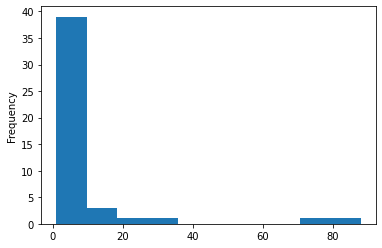

In [25]:
# printing a histogram for the results based on the frequencies
dataset_en['Predicted'].value_counts().plot(kind='hist')

In [16]:
# counting frequencies of toxicity scores
dataset_ar.Predicted.value_counts()

0.03    41
0.04    36
0.05    29
0.02    28
0.07    26
0.06    22
0.08    20
0.09    19
0.13    16
0.10    16
0.23    16
0.16    13
0.14    11
0.27    11
0.17    10
0.11     9
0.15     8
0.12     8
0.20     8
0.19     7
0.18     5
0.28     4
0.39     4
0.24     4
0.32     3
0.30     3
0.26     3
0.29     2
0.21     2
0.43     2
0.01     2
0.35     2
0.44     1
0.41     1
0.38     1
0.00     1
0.36     1
0.34     1
0.31     1
0.25     1
0.22     1
0.46     1
Name: Predicted, dtype: int64

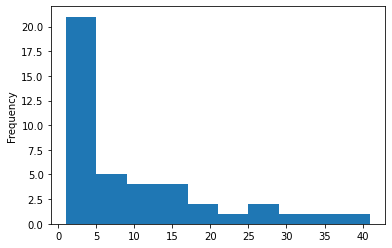

In [24]:
# printing a histogram for the results based on the frequencies
dataset_ar['Predicted'].value_counts().plot(kind='hist')

In [26]:
# print the tweet with the highest toxicity score
last = dataset_ar.iloc[-1:]
last.tweet

122    شوف عمرك كبير بس عقلك عقل مدري ايش حتى حيوان ي...
Name: tweet, dtype: object